**Importing the Training Dataset**

This dataset consists of tweets and their classification of toxicity levels.

In [97]:
import pandas as pd
import numpy as np

DATASET_ENCODING = "ISO-8859-1"
dataframe = pd.read_csv("./Dataset/train.csv", encoding = DATASET_ENCODING)
dataframe.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


**Massaging the Dataset**

We don't need the levels of toxicity, we only need to know if the tweet is toxic or non-toxic. Hence, removing the un-necessary columns and adding target column (0 - Toxic, 1 - Non-Toxic). 

In [98]:
dataframe["target"] = [ 1 if row["toxic"] == 1 or row["severe_toxic"] == 1 or row["obscene"] == 1 or row["threat"] == 1 or row["insult"] == 1 or row["identity_hate"] == 1 else 0 for index, row in dataframe.iterrows()]
dataframe = dataframe.drop(labels=["toxic","severe_toxic","obscene","threat","insult","identity_hate","id"], axis=1)
dataframe.head()

,comment_text,target
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


**Splitting the dataset for Train and Test**

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(dataframe["comment_text"],dataframe["target"] ,random_state=71, test_size=0.33, shuffle=True)

**Preprocessing the Training dataset**

Preprocessing, both training and testing dataset. 
1. Remove URL's 
2. Remove mentions and hashtags
3. Remove special characters and punctuation
4. Convert to lowercase
5. Remove extra whitespace

In [100]:
import re

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = str(tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    # Remove mentions and hashtags
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r"#[A-Za-z0-9]+", "", tweet)
    # Remove special characters and punctuation
    tweet = re.sub(r"[^a-zA-Z0-9]", " ", tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove extra whitespace
    tweet = re.sub(r"\s+", " ", tweet).strip()
    return tweet


X_train = [preprocess_tweet(tweet) for tweet in X_train]
X_test = [preprocess_tweet(tweet) for tweet in X_test]

**Initilizing TFID Vectorizer of SkLearn for feature extraction**

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')


**Naive Bayes Classifier**

In [102]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Initialize classifier
nb_clf = MultinomialNB()

# Build the pipeline
nb_pipeline = make_pipeline(vectorizer, nb_clf)

# Fit the model to training data
nb_pipeline.fit(X_train, Y_train)

# Predict on testing data
y_pred = nb_pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9170132361039898


**SVM Classifier**

In [103]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Define the pipeline
svm_pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('svd', TruncatedSVD(n_components=300)),
    ('svm', SVC(kernel='linear'))
])

# Fit the pipeline to the training data
svm_pipeline.fit(X_train, Y_train)

# Evaluate the pipeline on the test data
y_pred = svm_pipeline.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9413395620881521


**Decision Tree Classifier**

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
# gb_clf = GradientBoostingClassifier()

# Define pipeline for Decision Tree
# dt_pipeline = Pipeline([
#     ('vect', vectorizer),
#     ('clf', dt_clf)
# ])

# Define pipeline for Random Forest
rf_pipeline = Pipeline([
    ('vect', vectorizer),
    ('clf', rf_clf)
])

# Define pipeline for Gradient Boosting
# gb_pipeline = Pipeline([
#     ('vect', vectorizer),
#     ('clf', gb_clf)
# ])

# Train and fit the models
# dt_pipeline.fit(X_train, Y_train)
rf_pipeline.fit(X_train, Y_train)
# gb_pipeline.fit(X_train, Y_train)

# Predict using the models
# dt_prediction = dt_pipeline.predict(X_test)
rf_prediction = rf_pipeline.predict(X_test)
# gb_prediction = gb_pipeline.predict(X_test)

# Evaluate the models
# dt_accuracy = dt_pipeline.score(X_test, Y_test)
rf_accuracy = rf_pipeline.score(X_test, Y_test)
# gb_accuracy = gb_pipeline.score(X_test, Y_test)

# print("Decision Tree accuracy:", dt_accuracy)
print("Random Forest accuracy:", rf_accuracy)
# print("Gradient Boosting accuracy:", gb_accuracy)


Random Forest accuracy: 0.9530754476917526


**Initilizing Tweepy API Object**

In [109]:
import tweepy
import pandas as pd

# Enter your API keys and access tokens here
CONSUMER_KEY = 'e70jaac85aASCS8qg2N0aCB8P'
CONSUMER_SECRET = 'yytDOrc9JN8Xxih5lfvIF6ALvWYGW7LoDFhgHbtradEO7nnIjc'
OAUTH_TOKEN = '1267093465659301890-r7fiLA5bRVZHxpAQdnmSOYwnxfeFmF'
OAUTH_TOKEN_SECRET = 'pqskdjvhckzzokCWhOkCtSqcsZlPyo4Ry9s80fQ19mzPN'

# CONSUMER_KEY = "QKOLM8Az8HAK5oy3kjz6Cav1W"
# CONSUMER_SECRET = "IMNFnkJv1vdOuWWDUGj4UKGOs7GuKph00xZ87vLTiuNZzhqngu"
# OAUTH_TOKEN = "1440684852232146948-cnmmqSPXC3qJ33v3D7WMZJINO6Utxn"
# OAUTH_TOKEN_SECRET = "7D0yvzLpRIWjaNwXPI9WqVHPvxuim3mmCPO5N2t17LrAo"

# CONSUMER_KEY = "8776pU7nhmoexUCPknHskmuCK"
# CONSUMER_SECRET = "UoYbA7AjlBulFB5MuOFY3wuLuYy0ZkynnhnO1Vi4if5ur4xWDu"
# OAUTH_TOKEN = "1288143709-zOCpcXHueA9QE6822Ns0x6qXshpurdeJupsJKzX"
# OAUTH_TOKEN_SECRET = "yKmv4ezCEJdAn1C2omYx8MNyJwFiZOmsSv0WohUuXTBxz"

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

# Create the API object
api = tweepy.API(auth)

**Define the username of the user whose tweets and comments you want to retrieve**

In [110]:
username = 'TheDemocrats'

# Get the latest 100 tweets of the user
tweets = api.user_timeline(screen_name=username, count=400, tweet_mode='extended')

# Create a list to store the data
data = []


**Building the Dataset of the Tweets extracted**

In [111]:
import time
# For each tweet, get the top 1000 comments and store the data in the list
for tweet in tweets:
    try:
        comments = api.search_tweets(q='to:'+username, since_id=tweet.id, count=1000, tweet_mode='extended')
    except tweepy.TweepyException as e:
        if "Too Many Requests" in str(e):
            print("Rate limit exceeded. Waiting for 15 minutes.")
            time.sleep(15 * 60)  # Wait for 15 minutes
            comments = api.search_tweets(q='to:'+username, since_id=tweet.id, count=1000, tweet_mode='extended')
        else:
            print(e)
    for comment in comments:
        if(comment.user.screen_name != username):
            data.append({'tweet_id': comment.id, 'tweet': comment.full_text, 'user of the tweet': comment.user.screen_name})

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(data)

Rate limit exceeded. Waiting for 15 minutes.


In [112]:
df

,tweet_id,tweet,user of the tweet
0,1649972417651982338,"@TheDemocrats @JoeBiden YEP, WE REALLY NEED BE...",WHOAPATCH53
1,1649972186042732544,@TheDemocrats @JesusNarrowWay Get rid of DeSan...,ZeldaDan1
2,1649971468543959041,@TheDemocrats @JoeBiden You posted a picture o...,OldGardener137
3,1649971385316548611,@TheDemocrats @JoeBiden Fantastic. Why won’t h...,geoffkryten
4,1649971035880722432,@TheDemocrats @JoeBiden Pedophile,stormindentist
...,...,...,...
16595,1649963156578476035,"RT @CreasonJana: @TheDemocrats, with help from...",MAdamson2022
16596,1649962494021238789,@TheDemocrats @JoeBiden https://t.co/uCYc2Bou4l,BetaTomorrow
16597,1649962376870100998,@TheDemocrats @JoeBiden https://t.co/Y0s9kpJ8xI,DavidHa17134419
16598,1649962345139957761,"@TheDemocrats @JoeBiden Oh yikes, look at the ...",DiforTruth


**Running the prediction across all 3 models**

In [114]:
inp_data = df["tweet"]
pred_1 = [1 if svm_pipeline.predict([i]) == [1] else 0 for i in inp_data]
pred_2 = [1 if rf_pipeline.predict([i]) == [1] else 0 for i in inp_data]
pred_3 = [1 if nb_pipeline.predict([i]) == [1] else 0 for i in inp_data]


n = len(pred_1)
combine_pred = []
for i in range(n):
    if pred_1[i] == 1 or pred_2[i] == 1 or pred_3[i] == 1:
        combine_pred.append(1)
    else:
        combine_pred.append(0)


**Adding the prediction column to the dataframe**

In [115]:
# combine_pred = pred_1 + pred_2 + pred_3
new_column_series = pd.Series(combine_pred)

# add the new column to the original dataframe
df.insert(loc=3,column='Prediction', value=new_column_series)
df

,tweet_id,tweet,user of the tweet,Prediction
0,1649972417651982338,"@TheDemocrats @JoeBiden YEP, WE REALLY NEED BE...",WHOAPATCH53,0
1,1649972186042732544,@TheDemocrats @JesusNarrowWay Get rid of DeSan...,ZeldaDan1,0
2,1649971468543959041,@TheDemocrats @JoeBiden You posted a picture o...,OldGardener137,0
3,1649971385316548611,@TheDemocrats @JoeBiden Fantastic. Why won’t h...,geoffkryten,0
4,1649971035880722432,@TheDemocrats @JoeBiden Pedophile,stormindentist,1
...,...,...,...,...
16595,1649963156578476035,"RT @CreasonJana: @TheDemocrats, with help from...",MAdamson2022,0
16596,1649962494021238789,@TheDemocrats @JoeBiden https://t.co/uCYc2Bou4l,BetaTomorrow,0
16597,1649962376870100998,@TheDemocrats @JoeBiden https://t.co/Y0s9kpJ8xI,DavidHa17134419,0
16598,1649962345139957761,"@TheDemocrats @JoeBiden Oh yikes, look at the ...",DiforTruth,1


**Identifying Toxic Users**

In [116]:
toxic_users = [ i["user of the tweet"] for index,i in df.iterrows() if i["Prediction"] == 1]
len(toxic_users)

1728

In [117]:
toxic_users_unique = list(set(toxic_users))
len(toxic_users_unique)

10

**These are the toxic users**

In [118]:
toxic_users_unique

['dylan_corp',
 'oznev2',
 'pacer2000',
 'bergasorio',
 'rumprlstilsken',
 'stormindentist',
 'vegasdude71',
 'DiforTruth',
 'GlennHinzman',
 'chris_tondre']

In [119]:
def lookup_users_chunks(api, user_ids):
    chunks = [user_ids[i:i+100] for i in range(0, len(user_ids), 100)]
    # Lookup user information for each chunk of 100 user IDs
    users = []
    for chunk in chunks:
        lookup_users = api.lookup_users(user_id=chunk)
        users.extend(lookup_users)
    
    return users

**Creating a Social Network**

Rate limit exceeded. Waiting for 15 minutes.


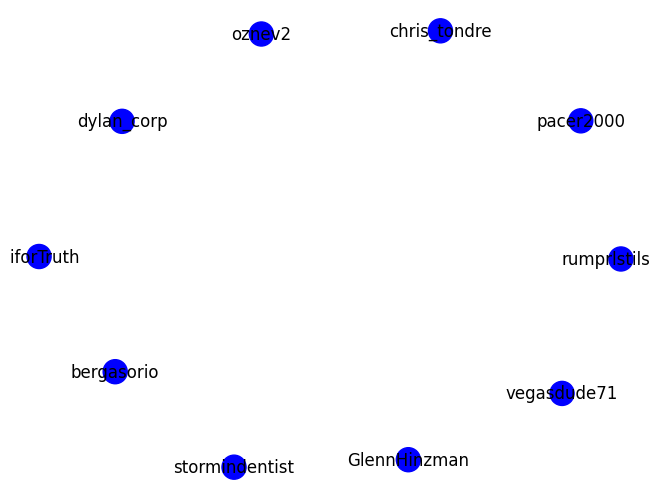

In [120]:
import networkx as nx
import matplotlib.pyplot as plt

depth = 2

# Initialize the graph
G = nx.Graph()

# Add the nodes to the graph
for username in toxic_users:
    try:
        user = api.get_user(screen_name=username)
    except tweepy.TweepyException as e:
        if "Too Many Requests" in str(e):
              print("Rate limit exceeded. Waiting for 15 minutes.")
              time.sleep(15 * 60)  # Wait for 15 minutes
              user = api.get_user(screen_name=username)
        else:
            print(e)
    G.add_node(username, name=user.name, color="blue")

# Add the edges to the graph
for d in range(1, depth+1):
    for username in toxic_users:
        if G.nodes[username].get('depth') == d-1:
            try:
                user = api.get_user(screen_name=username)
                friends = api.get_friend_ids(screen_name=username)
                lookup_users = lookup_users_chunks(api=api,user_ids=friends)
                for target in lookup_users:
                    if G.has_node(target.screen_name):
                        G.add_edge(username, target.screen_name)
            except tweepy.TweepyException as e:
                if "Too Many Requests" in str(e):
                    print("Rate limit exceeded. Waiting for 15 minutes.")
                    time.sleep(15 * 60)  # Wait for 15 minutes
                    user = api.get_user(screen_name=username)
                    friends = api.get_friend_ids(screen_name=username)
                    lookup_users = lookup_users_chunks(api=api,user_ids=friends)
                else:
                    print(f"Error processing {username}: {str(e)}")
        G.nodes[username]['depth'] = d

# Draw the graph
node_colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()